<h1 align=center>Feature Map Extraction</h1>

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from brainscore_vision import load_model

/Users/hamzaremmal/.pyenv/versions/3.11.10/envs/cs433-project2/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


## Load the model

In [2]:
alexnet   = load_model('alexnet')
act_model = alexnet.activations_model
model     = act_model._model

/Users/hamzaremmal/.pyenv/versions/3.11.10/envs/cs433-project2/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hamzaremmal/.pyenv/versions/3.11.10/envs/cs433-project2/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Load the Image

In [3]:
image = Image.open("resources/cat.jpg").convert("RGB")

## Preprocess the input

In [4]:
# Define the transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image).unsqueeze(0)
input_tensor

tensor([[[[1.5639, 1.6324, 1.7009,  ..., 1.8550, 1.8550, 1.8379],
          [1.5639, 1.6324, 1.7009,  ..., 1.8893, 1.8893, 1.8722],
          [1.5639, 1.6324, 1.7009,  ..., 1.9407, 1.9235, 1.8893],
          ...,
          [1.1015, 1.1529, 1.0844,  ..., 1.6324, 1.6495, 1.6495],
          [1.1187, 1.1529, 1.1015,  ..., 1.7009, 1.7009, 1.6838],
          [1.0331, 1.0673, 1.0673,  ..., 1.7352, 1.7352, 1.7523]],

         [[1.6232, 1.6933, 1.7458,  ..., 1.8683, 1.8508, 1.8333],
          [1.6232, 1.6933, 1.7458,  ..., 1.9034, 1.8859, 1.8508],
          [1.6232, 1.6933, 1.7458,  ..., 1.8859, 1.8508, 1.7983],
          ...,
          [0.7129, 0.7654, 0.6954,  ..., 1.5707, 1.5882, 1.5882],
          [0.7479, 0.7829, 0.7304,  ..., 1.6408, 1.6408, 1.6232],
          [0.6954, 0.7304, 0.7304,  ..., 1.6758, 1.6758, 1.6933]],

         [[1.2282, 1.3502, 1.4897,  ..., 1.8905, 1.8731, 1.8383],
          [1.2282, 1.3328, 1.4897,  ..., 1.9254, 1.8905, 1.8557],
          [1.2108, 1.3154, 1.4548,  ..., 1

In [5]:
## List to store the feature maps
feature_maps = []

In [6]:
def hook_fn(module, input, output):
    feature_maps.append(output)

for layer in model.features:
    if isinstance(layer, torch.nn.Conv2d):
        layer.register_forward_hook(hook_fn)

In [7]:
model(input_tensor)

tensor([[-5.7651e+00, -9.9024e-02, -2.7131e+00, -2.1426e+00, -2.5202e+00,
          8.3159e+00, -2.1090e+00,  4.6469e+00,  7.3573e+00, -2.8718e+00,
         -1.6395e+00, -2.6128e+00, -7.4929e-01, -3.1794e+00, -3.1397e+00,
         -2.4148e+00, -3.4896e-02, -2.2282e+00, -3.6945e+00, -5.9191e+00,
         -4.2178e+00, -2.8515e+00, -1.5396e+00, -6.1907e+00, -5.8510e+00,
         -5.7534e+00, -4.4629e+00, -2.3624e+00, -3.8669e+00, -8.1298e-02,
         -6.9009e+00, -5.5404e+00, -8.4426e+00, -2.6898e+00, -3.7525e+00,
         -5.8093e+00,  7.7089e-01, -3.2934e+00,  1.5343e+00, -4.8770e+00,
         -4.8143e-01, -4.6718e+00, -2.7947e+00, -4.2908e+00,  8.5482e-01,
         -6.6265e+00,  4.6926e-01,  7.0206e-01, -8.6654e+00, -7.2173e+00,
         -5.4896e+00, -3.6916e+00, -2.7076e-01, -5.3255e+00, -6.9629e-01,
         -3.8404e+00,  9.1489e-01, -7.1443e+00, -6.6223e+00, -1.0821e+00,
         -1.3410e+00, -4.0578e+00, -1.5176e+00, -4.2619e+00, -3.5644e+00,
         -6.6771e+00,  1.1686e+00, -1.

In [8]:
len(feature_maps)

5

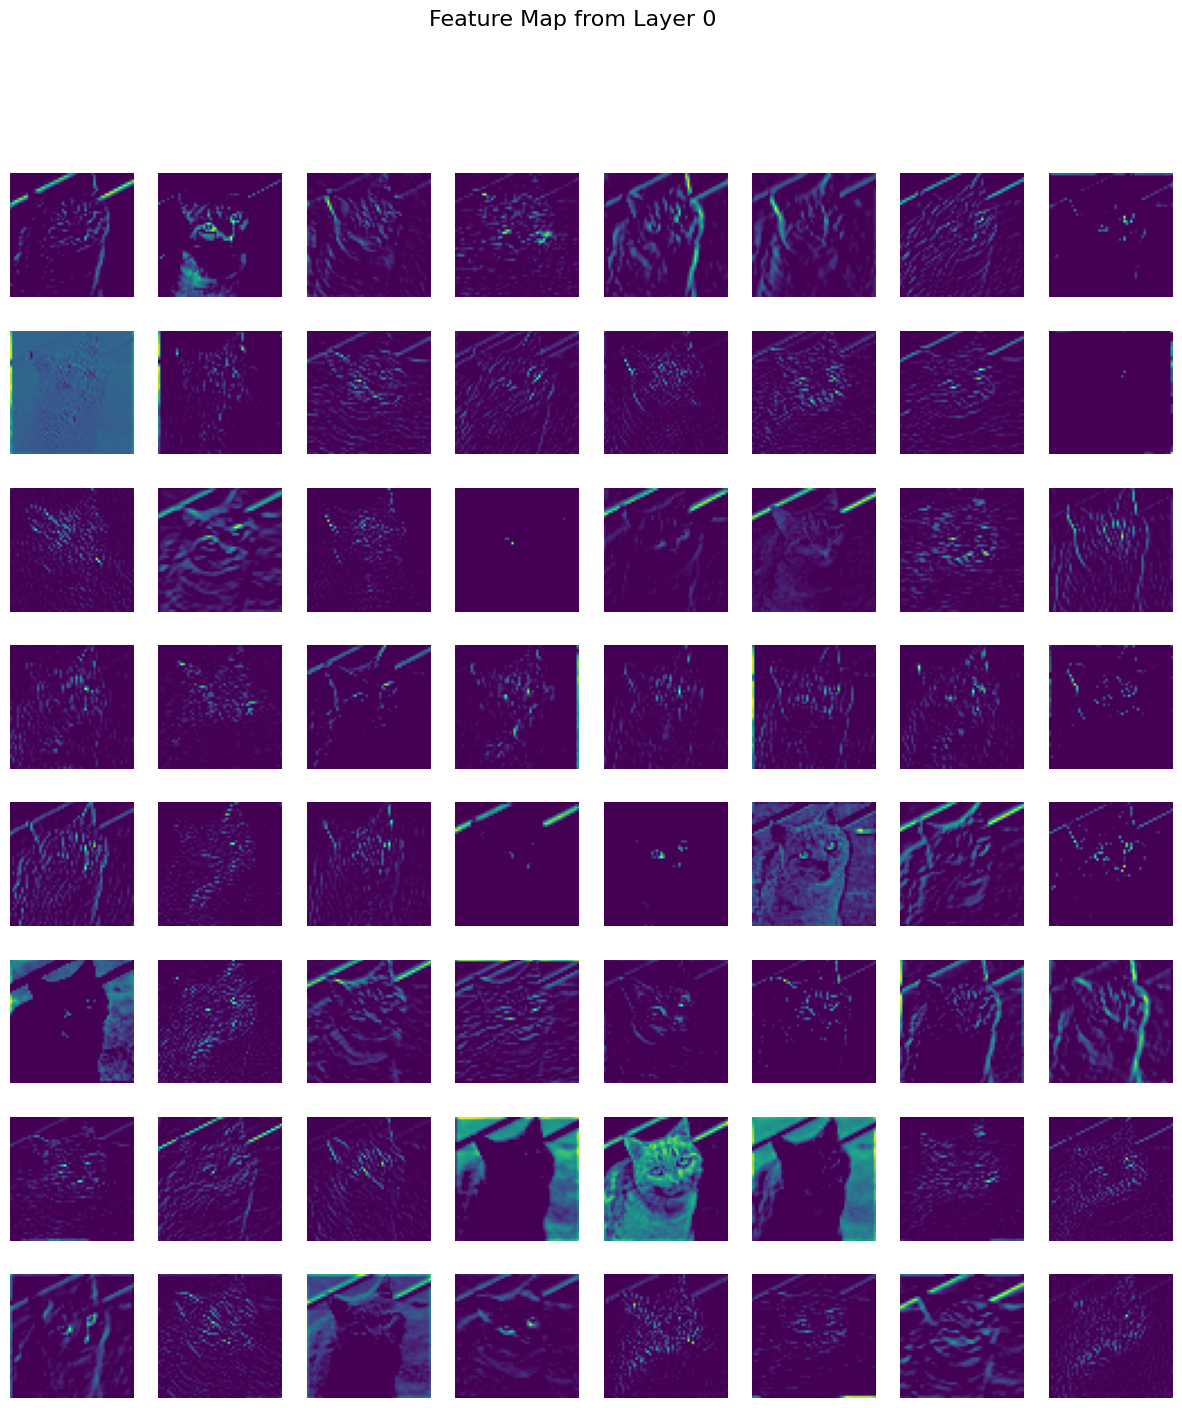

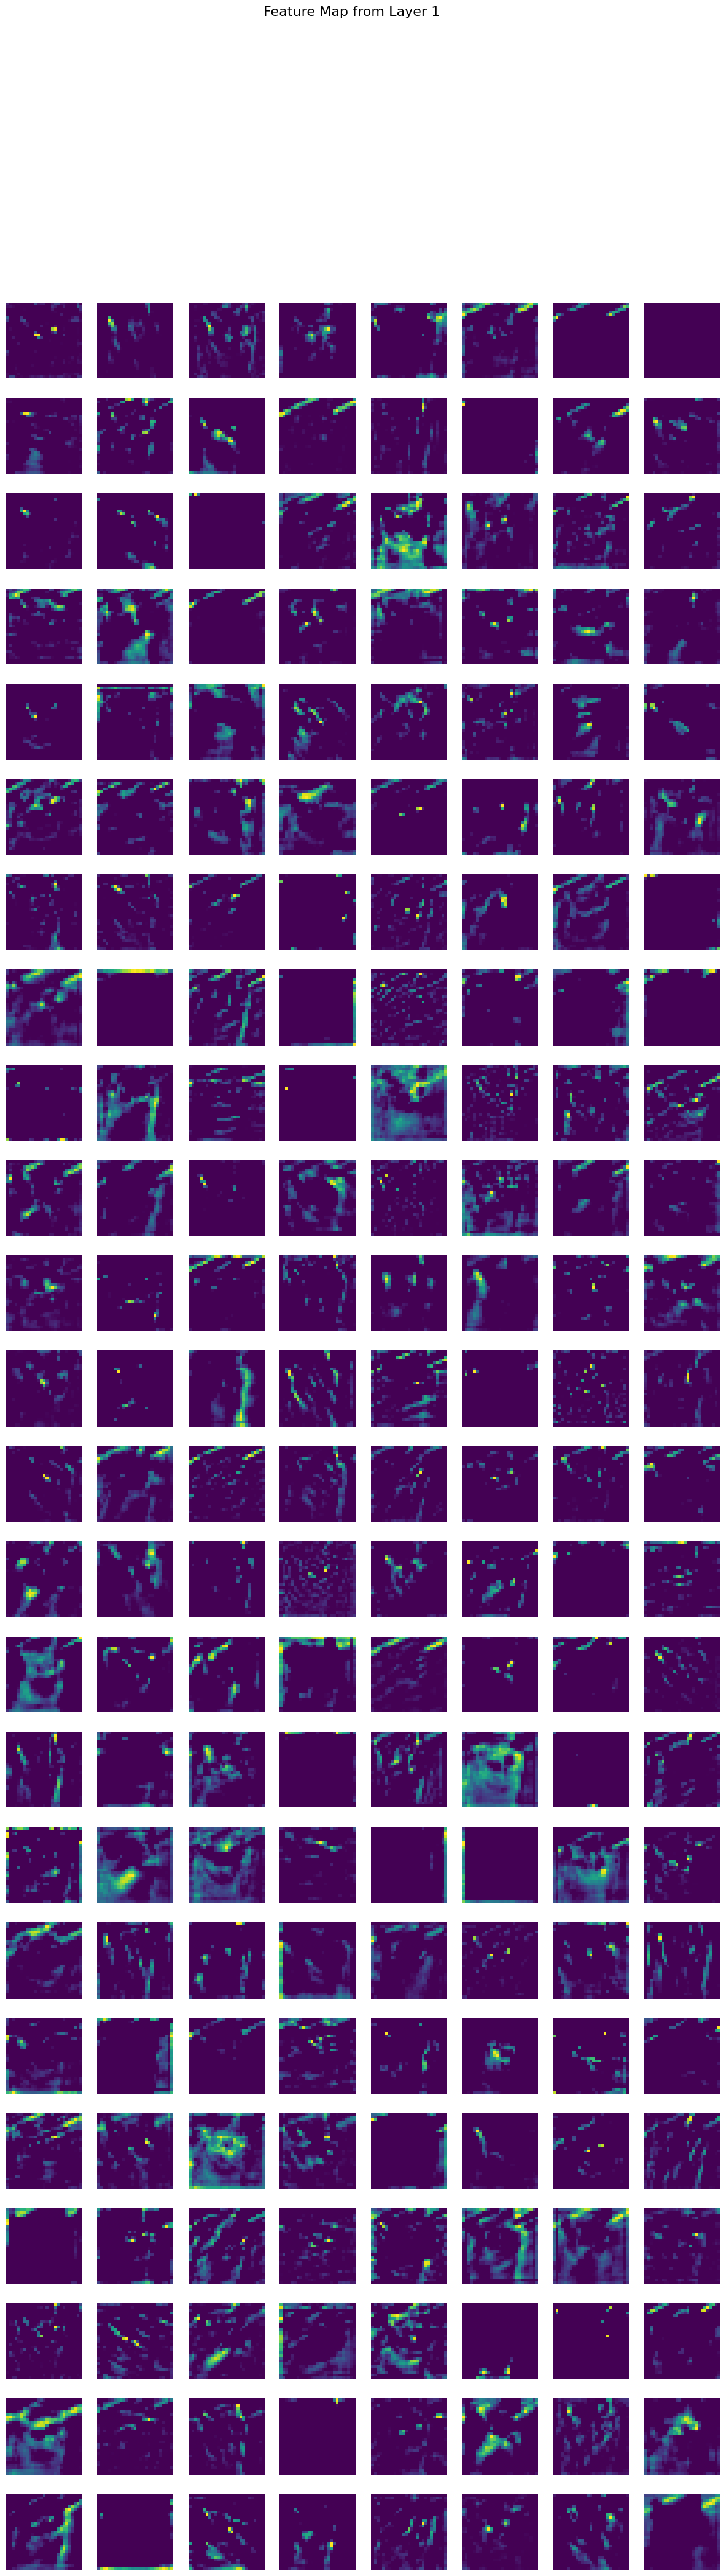

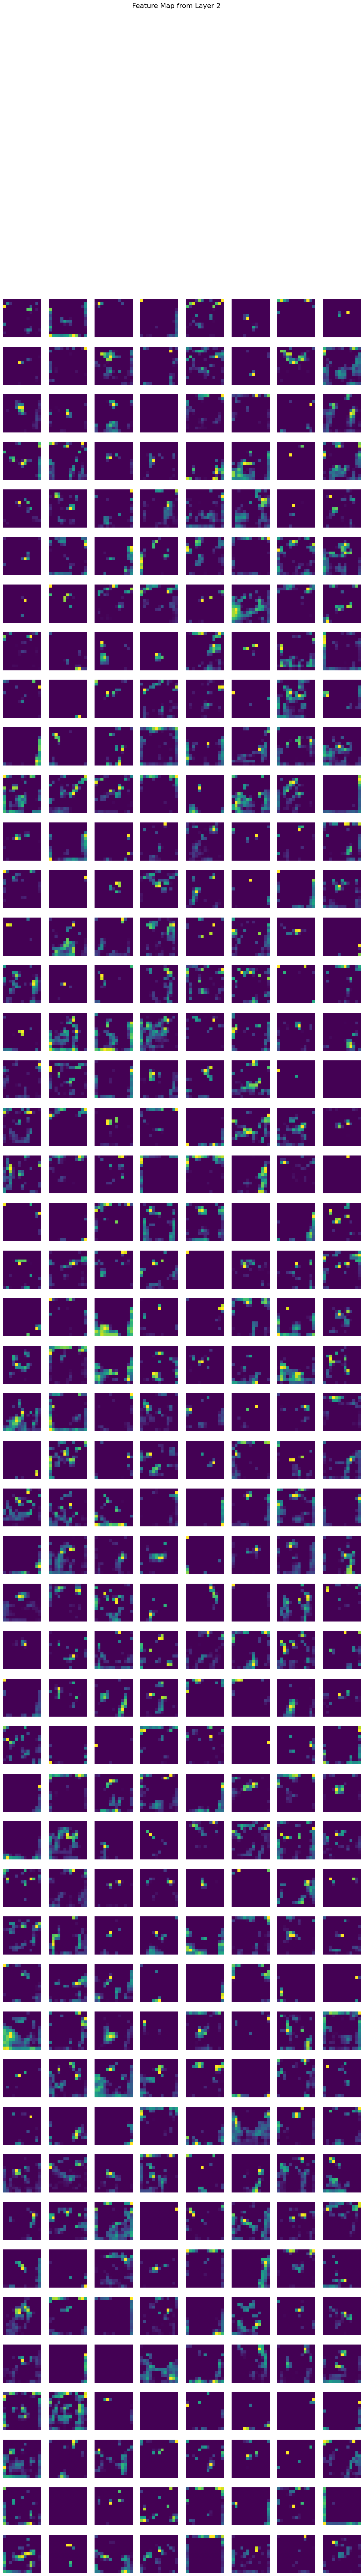

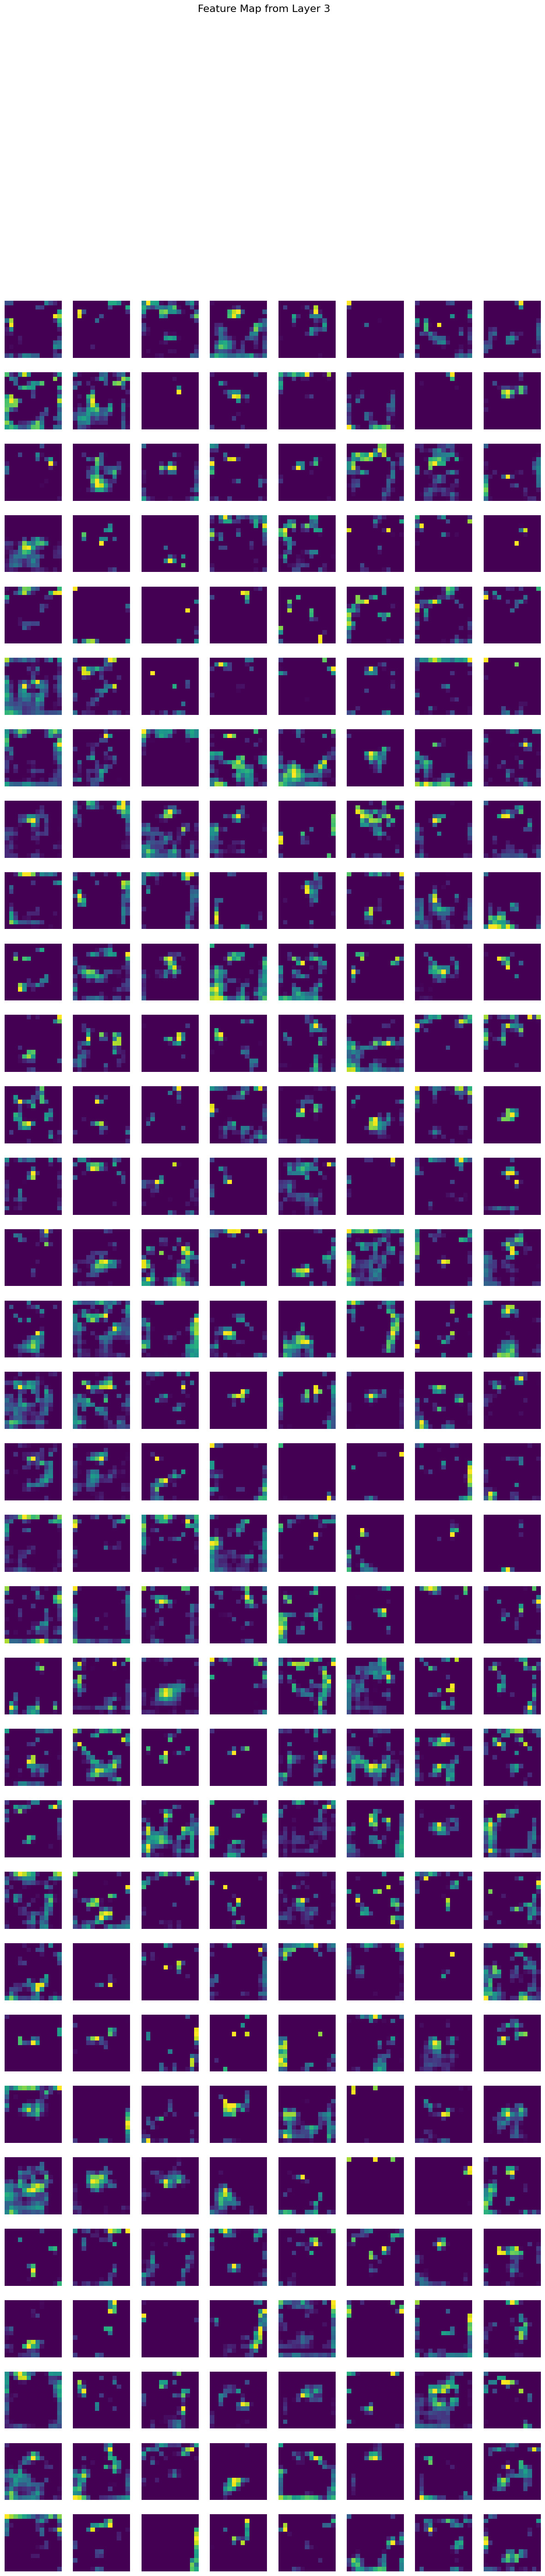

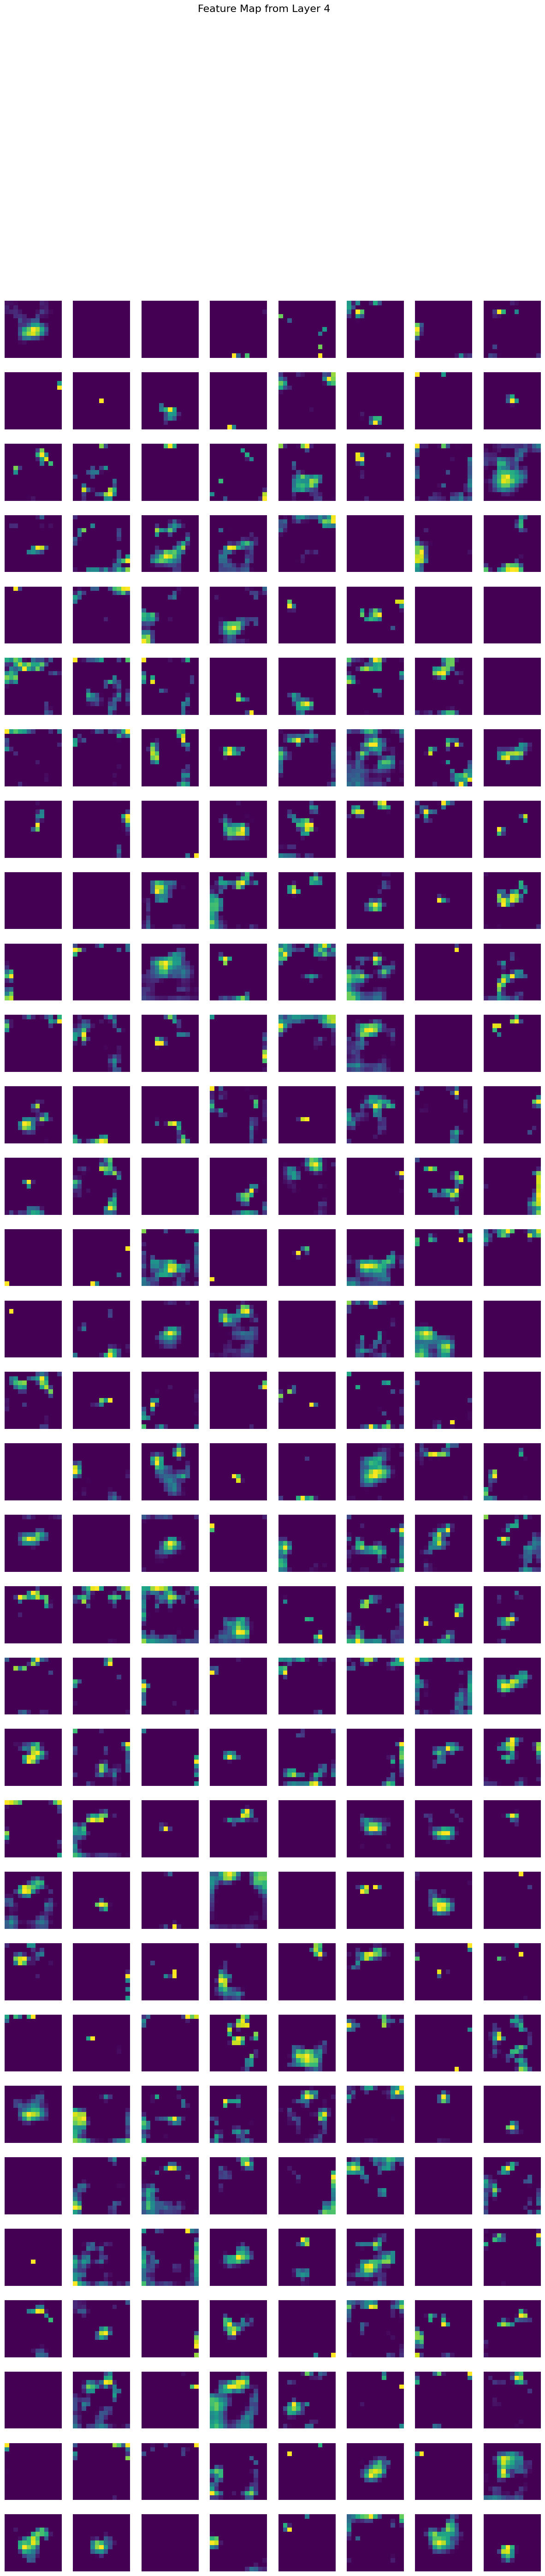

In [9]:
def plot_feature_maps(feature_map, layer_idx, num_cols=8):
    num_channels = feature_map.shape[1]
    num_rows = (num_channels + num_cols - 1) // num_cols
    plt.figure(figsize=(15, num_rows * 2))
    
    for i in range(num_channels):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(feature_map[0, i].detach().numpy(), cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Map from Layer {layer_idx}", fontsize=16)
    plt.show()

for i in range(0, len(feature_maps)):
    plot_feature_maps(feature_maps[i], layer_idx=i)